<a href="https://colab.research.google.com/github/djamoreland/Quantitative-Neuroscience-Moreland/blob/main/Quantal_Release_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy
from scipy.stats import binom
import matplotlib.pyplot as plt
import pandas as pd
import collections

**Exercise 1**

Assume that there are 10 quanta available in a nerve terminal, and for a given release event each *is* released with a probability of 0.2. For one such event, what is the probability that 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, or 10 quanta will be released?

The probability that 1 quanta will be released is 0.26843545599999996
The probability that 2 quanta will be released is 0.30198988800000004
The probability that 3 quanta will be released is 0.20132659199999992
The probability that 4 quanta will be released is 0.0880803839999999
The probability that 5 quanta will be released is 0.026424115199999983
The probability that 6 quanta will be released is 0.005505024000000005
The probability that 7 quanta will be released is 0.000786432
The probability that 8 quanta will be released is 7.372800000000001e-05
The probability that 9 quanta will be released is 4.095999999999997e-06
The probability that 10 quanta will be released is 1.0240000000000006e-07


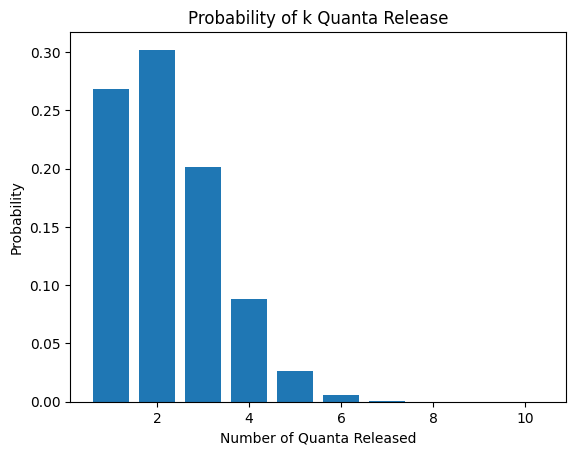

In [ ]:
n = 10
k_list = [1,2,3,4,5,6,7,8,9,10]
p =0.2

prob_list = []
for k in k_list:
  prob = binom.pmf(k,n,p)
  prob_list.append(prob)

  print(f'The probability that {k} quanta will be released is {prob}')

plt.bar(k_list,prob_list)
plt.xlabel('Number of Quanta Released')
plt.ylabel('Probability')
plt.title('Probability of k Quanta Release')
plt.show()



**Exercise 2**

Let's say you know that a given nerve terminal contains exactly 14 quanta available for release. You have read in the literature that the release probability of these quanta is low, say 0.1. To assess whether this value is reasonable, you run a simple experiment: activate the nerve and measure the number of quanta that are released. The result is 8 quanta. What is the probability that you would get this result (8 quanta) if the true probability of release really was 0.1? What about if the true release probability was much higher; say, 0.7? What about for each decile of release probability (0.1, 0.2, ... 1.0)? Which value of release probability did you determine to be the most probable, given your measurement?


The probability of getting the result 8 quanta with a release proability of 0.1 is 1.5959173230000027e-05
---------------------------------------------------------------------------------------------------
The probability of getting the result 8 quanta with a release proability of 0.7 is 0.12620227406787007
---------------------------------------------------------------------------------------------------
The probability of getting the result with a release proability of 0.1 is 1.5959173230000027e-05
The probability of getting the result with a release proability of 0.2 is 0.002015279185920003
The probability of getting the result with a release proability of 0.30000000000000004 is 0.02318000952267002
The probability of getting the result with a release proability of 0.4 is 0.09182115790847997
The probability of getting the result with a release proability of 0.5 is 0.18328857421875008
The probability of getting the result with a release proability of 0.6 is 0.20659760529407983
The pro

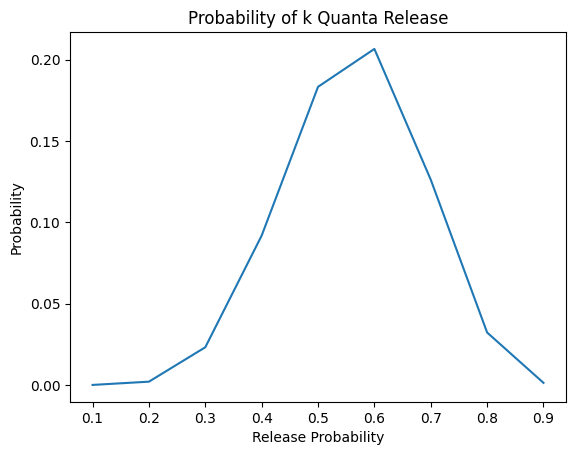

In [ ]:
n = 14
p_initial = 0.1
p_second = 0.7
k = 8

p_list = list(np.arange(0.1,1,0.1))

#Release probability of 0.1
prob = binom.pmf(k,n,p_initial)
print(f'The probability of getting the result {k} quanta with a release proability of {p_initial} is {prob}')

print(f'---------------------------------------------------------------------------------------------------')

#Release probability of 0.7
prob = binom.pmf(k,n,p_second)
print(f'The probability of getting the result {k} quanta with a release proability of {p_second} is {prob}')

print(f'---------------------------------------------------------------------------------------------------')

#Each decile
prob_list = []
for p in p_list:
  prob = binom.pmf(k,n,p)
  prob_list.append(prob)
  print(f'The likelihood of getting the result with a release proability of {p} is {prob}')


plt.plot(p_list,prob_list)
plt.xlabel('Release Probability')
plt.ylabel('Probability')
plt.title('Likelihood')
plt.show()



**Exercise 3**

Not feeling convinced by your single experiment (good scientist!), you repeat it under identical conditions. This time you measure 5 quanta that were released. Your sample size has now doubled, to two measurements. You now want to take into account both measurements when you assess the likelihoods of different possible values of the underlying release probability. To do so, assume that the two measurements in this sample are independent of one another; that is, the value of each result had no bearing on the other. In this case, the total likelihood is simply the product of the likelihoods associated with each separate measurement. It is also typical to compute the logarithm of each likelihood and take their sum, which is often more convenient. **What are the values of the total likelihood and total log-likelihood in this example, if we assume that the true release probability is 0.1?**

Of course, knowing those values of the likelihood and log-likelihood is not particularly useful until you can compare them to the values computed for other possible values for the release probability, so you can determine which value of release probability is most likely, given the data. **Therefore, compute the full likelihood and log-likelihood functions using deciles of release probability between 0 and 1.** **What is the maximum value? Can you improve your estimate by computing the functions at a higher resolution? **How does the estimate improve as you increase the sample size?

In [ ]:
n = 14
k = 5
p_initial = 0.1
p_list = list(np.arange(0.1,1,0.1))
n_sample = 2
n_sample_list = list(np.arange(2,100,2))


#Initial 0.1 release probability
prob_1 = binom.pmf(k,n,p_initial)
prob_2 = binom.pmf(k,n,p_initial)

total_likelihood = prob_1 * prob_2
print(f'The total likelihood is {total_likelihood}')

total_log_likelihood = np.log(prob_1) + np.log(prob_2)
print(f'The total log-likelihood is {total_log_likelihood}')

print(f'---------------------------------------------------------------------------------------------------')


#For each decile
total_like_list = []
total_log_list = []

for p in p_list:
  prob_1 = binom.pmf(k,n,p)
  prob_2 = binom.pmf(k,n,p)

  total_likelihood = prob_1 * prob_2
  total_like_list.append(total_likelihood)

  total_log_likelihood = np.log(prob_1) + np.log(prob_2)
  total_log_list.append(total_log_likelihood)

  print(f'The total likelihood for a release probability of {p} is {total_likelihood}')
  print(f'The total loglikelihood for a release probability of {p} is {total_log_likelihood}')

print(f'---------------------------------------------------------------------------------------------------')


#Find max values
df = pd.DataFrame()

df['Release_Prob'] = p_list
df['Total_Likelihood'] = total_like_list
df['Total_Log_Likelihood'] = total_log_list

prob_max = df['Release_Prob'][df['Total_Likelihood'].idxmax()]

print(f'The max value for the total likelihood is {max(total_like_list)} and is at release probability {prob_max}')
print(f'The max value for the total log-likelihood is {max(total_log_list)} and is at release probability {prob_max}')

print(f'---------------------------------------------------------------------------------------------------')

#Optimize
n = 14
p = 0.1
k = 5
n_sample_list = list(np.arange(2,100,2))

prob_1_list = []
prob_2_list = []

for p in p_list:
  prob_1 = binom.pmf(k,n,p)
  prob_1_list.append(prob_1)

  prob_2 = binom.pmf(k,n,p)
  prob_2_list.append(prob_2)

prob_1_array = np.array(prob_1_list)
prob_2_array = np.array(prob_2_list)

total_likelihoods = prob_1_array * prob_2_array
total_log_likelihoods = np.log(prob_1_array) + np.log(prob_2_array)


The total likelihood is 6.015798986489146e-05
The total log-likelihood is -9.718536292030997
---------------------------------------------------------------------------------------------------
The total likelihood for a release probability of 0.1 is 6.015798986489146e-05
The total loglikelihood for a release probability of 0.1 is -9.718536292030997
The total likelihood for a release probability of 0.2 is 0.007393462403440431
The total loglikelihood for a release probability of 0.2 is -4.9071591282464455
The total likelihood for a release probability of 0.30000000000000004 is 0.03853944123531784
The total loglikelihood for a release probability of 0.30000000000000004 is -3.256073114406212
The total likelihood for a release probability of 0.4 is 0.04268257051324844
The total loglikelihood for a release probability of 0.4 is -3.153964626779052
The total likelihood for a release probability of 0.5 is 0.01493097841739651
The total loglikelihood for a release probability of 0.5 is -4.2043171

**Exercise 4**

You keep going and conduct 100 separate experiments and end up with these results:

Measured releases	Count
0	0
1	0
2	3
3	7
4	10
5	19
6	26
7	16
8	16
9	5
10	5
11	0
12	0
13	0
14	0
What is the most likely value of p (which we typically refer to as  𝑝̂  , which is pronounced as "p-hat" and represents the maximum-likelihood estimate of a parameter in the population given our sample with a resolution of 0.01?

In [ ]:
#Made with help of chatgpt

k_list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
count_list = [0,0,3,7,10,19,26,16,16,5,5,0,0,0,0]
n = 14
p = 0.01

p_list = list(np.arange(0.01,1,0.01))

df = pd.DataFrame()
df['k'] = k_list
df['count'] = count_list

log_likelihood_list = []


for p in p_list:
    log_likelihood = 0
    for idx, row in df.iterrows():
        k = row['k']
        count = row['count']
        prob = binom.pmf(k, n, p)
        if prob > 0:  # avoid log(0)
            log_likelihood += count * np.log(prob)
    log_likelihood_list.append(log_likelihood)

# Store results
result = pd.DataFrame()
result['p'] = p_list
result['log_likelihood'] = log_likelihood_list

# Find MLE
p_hat = results.loc[results['log_likelihood'].idxmax(), 'p']
logL_max = results['log_likelihood'].max()

print(f'p-hat is: {p_hat}')
print(f'Log-likelihood at p-hat: {logL_max}')




results

p-hat is: 0.44
Log-likelihood at p-hat: -218.59351244556953


,p,log_likelihood
0,0.01,-2208.215249
1,0.02,-1764.168894
2,0.03,-1508.066921
3,0.04,-1328.967082
4,0.05,-1192.102592
...,...,...
94,0.95,-1757.434876
95,0.96,-1939.153418
96,0.97,-2175.477869
97,0.98,-2511.398391


**Exercise 5**

Let's say that you have run an exhaustive set of experiments on this synapse and have determined that the true release probability is 0.3 (within some very small tolerance). Now you want to test whether changing the temperature of the preparation affects the release probability. So you change the temperature, perform the experiment, and measure 7 quantal events for the same 14 available quanta. Compute  𝑝̂  . Standard statistical inference now asks the question, what is the probability that you would have obtained that measurement given a Null Hypothesis of no effect? In this case, no effect corresponds to an unchanged value of the true release probability (i.e., its value remained at 0.3 even with the temperature change). **What is the probability that you would have gotten that measurement if your Null Hypothesis were true? Can you conclude that temperature had an effect?**

In [ ]:
p_control = 0.3
n = 14
k = 7
p_test = 7/14

p_list = list(np.arange(0.1,1,0.1))

prob_null = binom.pmf(k,n,p_control)
prob_test = binom.pmf(k,n,p_test)

print(f'p-hat is {p_test} because there is only one event')
print(f'The probability of getting {k} releases with the null hypothesis being true is {prob_null:2f}')
print(f'As the probability is above 0.05, it is not significant')


p-hat is 0.5 because there is only one event
The probability of getting 7 releases with the null hypothesis being true is 0.061813
As the probability is above 0.05, it is not significant
